<p style = "font-size : 42px; color : 	#D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>EDA & Predict Prices of Airline Tickets</strong></p>





<img src="https://bcwcs.com/wp-content/uploads/2020/08/Air-Freight.jpg" style="margin-left: 10%; float: center;  border:5px solid ; width:80%; height : 80%;">

<a id = '0.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Table of Contents</strong></p> 


* [Importing libraries](#2.0)
* [Importing dataset](#4.0)
* [Checking for null values](#3.0)
* [EDA](#1.0)
* [Extract Numerical & Categorical Features?](#5.0)
* [Handling Categorical Data](#6.0)
* [Dealing with Outliers](#7.0)
* [Separate your independent & dependent data](#8.0)
* [Feature Selection](#9.0)
* [Defining function For ML models](#10.0)
    * [Random Forest Algorithm](#11.0)
    * [Gradient Boosting](#12.0)
    * [Linear Regression Algorithm](#13.0)
    * [MLPRegressor](#14.0)
    * [Lasso Algorithm](#15.0)
    * [Ridge Algorithm](#16.0)
    * [K-Neighbors Algorithm](#17.0)



<a id = '2.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Importing libraries</strong></p>



In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

<a id = '4.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Importing dataset </strong></p>

In [100]:
data = pd.read_excel('E:\Data_Train.xlsx')

<a id = '1.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Exploratory Data Analysis (EDA)</strong></p>


In [101]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [102]:
 data.shape 

(10683, 11)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [104]:
print('Data.describe')
data.describe(include= 'all').T

Data.describe


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Airline,10683,12,Jet Airways,3849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_of_Journey,10683,44,18/05/2019,504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,10683,5,Delhi,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,10683,6,Cochin,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route,10682,128,DEL → BOM → COK,2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Time,10683,222,18:55,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time,10683,1343,19:00,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,10683,368,2h 50m,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Stops,10682,5,1 stop,5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional_Info,10683,10,No info,8345,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

<a id = '3.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Checking for null values</strong></p>



In [106]:
null = pd.DataFrame({'Null Values' : data.isna().sum(), 'Percentage Null Values' : (data.isna().sum()) / (data.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
Airline,0,0.000000
Date_of_Journey,0,0.000000
Source,0,0.000000
Destination,0,0.000000
Route,1,0.009361
Dep_Time,0,0.000000
Arrival_Time,0,0.000000
Duration,0,0.000000
Total_Stops,1,0.009361
Additional_Info,0,0.000000


#### As less missing values,I can directly drop these

In [107]:
data.dropna(inplace=True)

In [108]:
null = pd.DataFrame({'Null Values' : data.isna().sum(), 'Percentage Null Values' : (data.isna().sum()) / (data.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
Airline,0,0.0
Date_of_Journey,0,0.0
Source,0,0.0
Destination,0,0.0
Route,0,0.0
Dep_Time,0,0.0
Arrival_Time,0,0.0
Duration,0,0.0
Total_Stops,0,0.0
Additional_Info,0,0.0


### From description we can see that Date_of_Journey is a object data type,
* Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction.
* model will not be able to understand Theses string values,it just understand Time-stamp
    For this we require pandas to_datetime to convert object data type to datetime dtype.

- dt.day method will extract only day of that date
- dt.month method will extract only month of that date

In [109]:
def change_into_datetime(col):
         data[col]=pd.to_datetime(data[col])

In [110]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [111]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [112]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [113]:
data['Journey_day']=data['Date_of_Journey'].dt.day
data['Journey_month']=data['Date_of_Journey'].dt.month

* Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.


In [114]:
data.drop('Date_of_Journey', axis=1, inplace=True)

In [115]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-07-30 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-07-30 05:50:00,2021-07-30 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-07-30 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-07-30 18:05:00,2021-07-30 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-07-30 16:50:00,2021-07-30 21:35:00,4h 45m,1 stop,No info,13302,3,1


### Defining functions extract values from [`Dep_Time` , `Arrival_Time`] columns and drop any column

In [116]:
# extract_hour function
def extract_hour(data,col):
    data[col+"_hour"]=data[col].dt.hour
# extract__minute function
def extract_min(data,col):
    data[col+"_minute"]=data[col].dt.minute
# drop columns function
def drop_column(data,col):
    data.drop(col,axis=1,inplace=True)

In [117]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time
extract_hour(data,'Dep_Time')

In [118]:
# Extracting Minutes
extract_min(data,'Dep_Time')

In [119]:
# Now we can drop Dep_Time as it is of no use
drop_column(data,'Dep_Time')

In [120]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-07-30 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-07-30 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-07-30 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [121]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
extract_hour(data,'Arrival_Time')

# Extracting minutes
extract_min(data,'Arrival_Time')

# Now we can drop Arrival_Time as it is of no use
drop_column(data,'Arrival_Time')

In [122]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


### Apply pre-processing on duration column,Separate Duration hours and minute from `duration` column

In [123]:
duration=list(data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   # Check if duration contains only hour
            duration[i]=duration[i] + ' 0m'      # Adds 0 minute
        else:
            duration[i]='0h '+ duration[i]       # if duration contains only second, Adds 0 hour

In [124]:
data['Duration']=duration

In [125]:
def hour(x):
    return x.split(' ')[0][0:-1]

In [126]:
def min(x):
    return x.split(' ')[1][0:-1]

In [127]:
data['Duration_hours']=data['Duration'].apply(hour)
data['Duration_mins']=data['Duration'].apply(min)

In [128]:
data.drop('Duration',axis=1,inplace=True)

In [129]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [130]:
data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

In [131]:
data['Duration_hours']=data['Duration_hours'].astype(int)
data['Duration_mins']=data['Duration_mins'].astype(int)

In [132]:
data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int32
Duration_mins           int32
dtype: object

In [133]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


<a id = '5.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong> Extract Numerical & Categorical Features</strong></p>      

In [134]:
num_features=[col for col in data.columns if data[col].dtype!='O']
num_features

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

In [135]:
cat_features=[col for col in data.columns if data[col].dtype=='O']
cat_features

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

<a id = '6.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Handling Categorical Data</strong></p>         

#### We are using 2 main Encoding Techniques to convert Categorical data into some numerical format
   * Nominal data --> data are not in any order --> OneHotEncoder is used in this case
   * Ordinal data --> data are in order -->       LabelEncoder is used in this case

In [136]:
categorical=data[cat_features]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [137]:
plt.style.use('fivethirtyeight')

### Airline vs Price Analysis

In [138]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

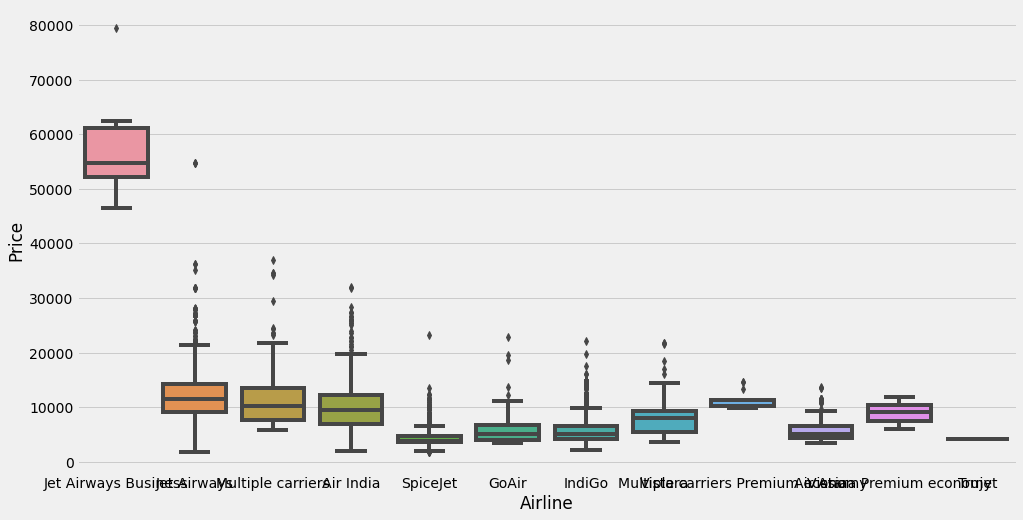

In [139]:
plt.figure(figsize=(15,8))
sns.boxplot(y='Price',x='Airline',data = data.sort_values('Price',ascending=False))

* From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median

In [140]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


## Source vs Price Analysis

In [141]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<Figure size 1080x576 with 0 Axes>

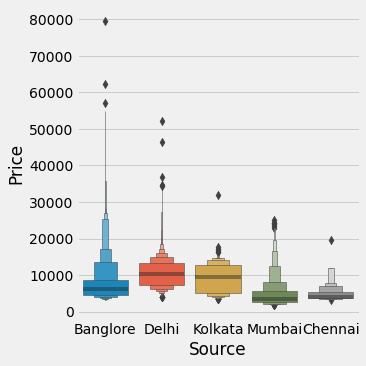

In [142]:
plt.figure(figsize=(15,8))
sns.catplot(y='Price',x='Source',data = data.sort_values('Price',ascending=False),kind='boxen')

In [143]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source=pd.get_dummies(categorical['Source'], drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [144]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<Figure size 1080x576 with 0 Axes>

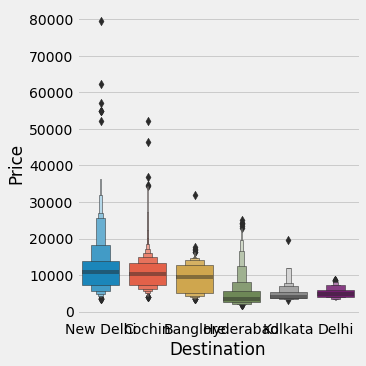

In [145]:
plt.figure(figsize=(15,8))
sns.catplot(y='Price',x='Destination',data = data.sort_values('Price',ascending=False),kind='boxen')

In [146]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination=pd.get_dummies(categorical['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [147]:
categorical['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [148]:
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

In [149]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [150]:
categorical['Route_1'].fillna('None',inplace=True)
categorical['Route_2'].fillna('None',inplace=True)
categorical['Route_3'].fillna('None',inplace=True)
categorical['Route_4'].fillna('None',inplace=True)
categorical['Route_5'].fillna('None',inplace=True)

In [151]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,None,None


In [152]:
#now extract how many categories in each cat_feature
for feature in categorical.columns:
    print('{} has total {} categories \n'.format(feature,len(categorical[feature].value_counts())))

Airline has total 12 categories 

Source has total 5 categories 

Destination has total 6 categories 

Route has total 128 categories 

Total_Stops has total 5 categories 

Additional_Info has total 10 categories 

Route_1 has total 5 categories 

Route_2 has total 45 categories 

Route_3 has total 30 categories 

Route_4 has total 14 categories 

Route_5 has total 6 categories 



* as we will see we have lots of features in Route , one hot encoding will not be a better option lets appply Label Encoding

In [153]:
encoder=LabelEncoder()

In [154]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [155]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [156]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,0,34,8,13,5


In [157]:
# Additional_Info contains almost 80% no_info,so we can drop this column
# we can drop Route as well as we have pre-process that column
    
drop_column(categorical,'Route')
drop_column(categorical,'Additional_Info')

In [158]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


In [159]:
categorical['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [160]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [161]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding key

dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [162]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [163]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [164]:
data[num_features]

,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,3897,24,3,22,20,1,10,2,50
1,7662,5,1,5,50,13,15,7,25
2,13882,6,9,9,25,4,25,19,0
3,6218,5,12,18,5,23,30,5,25
4,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...
10678,4107,4,9,19,55,22,25,2,30
10679,4145,27,4,20,45,23,20,2,35
10680,7229,27,4,8,20,11,20,3,0
10681,12648,3,1,11,30,14,10,2,40


In [165]:
# Concatenate dataframe --> categorical + Airline + Source + Destination

data = pd.concat([categorical,Airline,Source,Destination,data[num_features]],axis=1)
data.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,...,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [166]:
drop_column(data,'Airline')
drop_column(data,'Source')
drop_column(data,'Destination')

In [167]:
data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [168]:
pd.set_option('display.max_columns',35)

In [169]:
data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [170]:
data.shape

(10682, 35)

In [171]:
data.columns

Index(['Total_Stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Price', 'Journey_day', 'Journey_month', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hours', 'Duration_mins'],
      dtype='object')

<a id = '7.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Dealing with Outliers</strong></p>       

Rejection 36 points
z-score of 3 corresponds to a prob of 0.01%


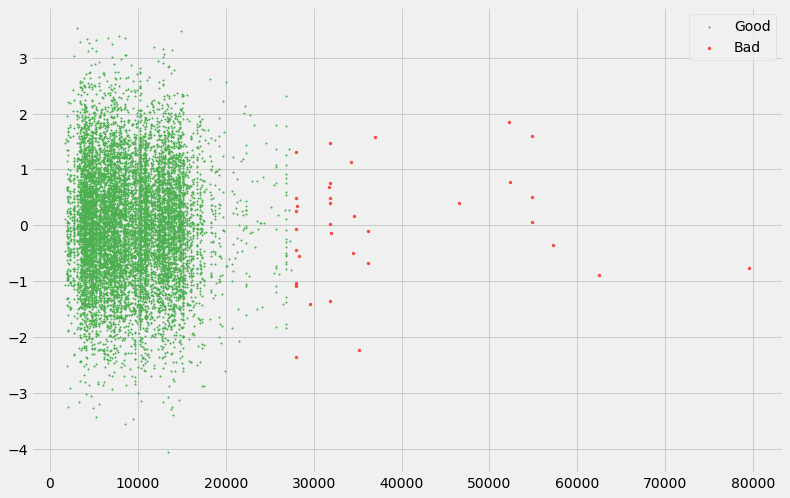

In [172]:
plt.figure(figsize=(12,8))
mean, std = np.mean(data['Price']), np.std(data['Price'])
z_score = np.abs((data['Price'] - mean) / std)
threshold = 4
good = z_score < threshold

print(f"Rejection {(~good).sum()} points")
from scipy.stats import norm
print(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")
visual_scatter = np.random.normal(size=data['Price'].size)
plt.scatter(data['Price'][good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
plt.scatter(data['Price'][~good], visual_scatter[~good], s=8, label="Bad", color="#F44336")
plt.legend();

* points Rejection is 36 so we replace it by price median 


In [173]:
data['Price']=np.where(data['Price']>=30000,data['Price'].median(),data['Price'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

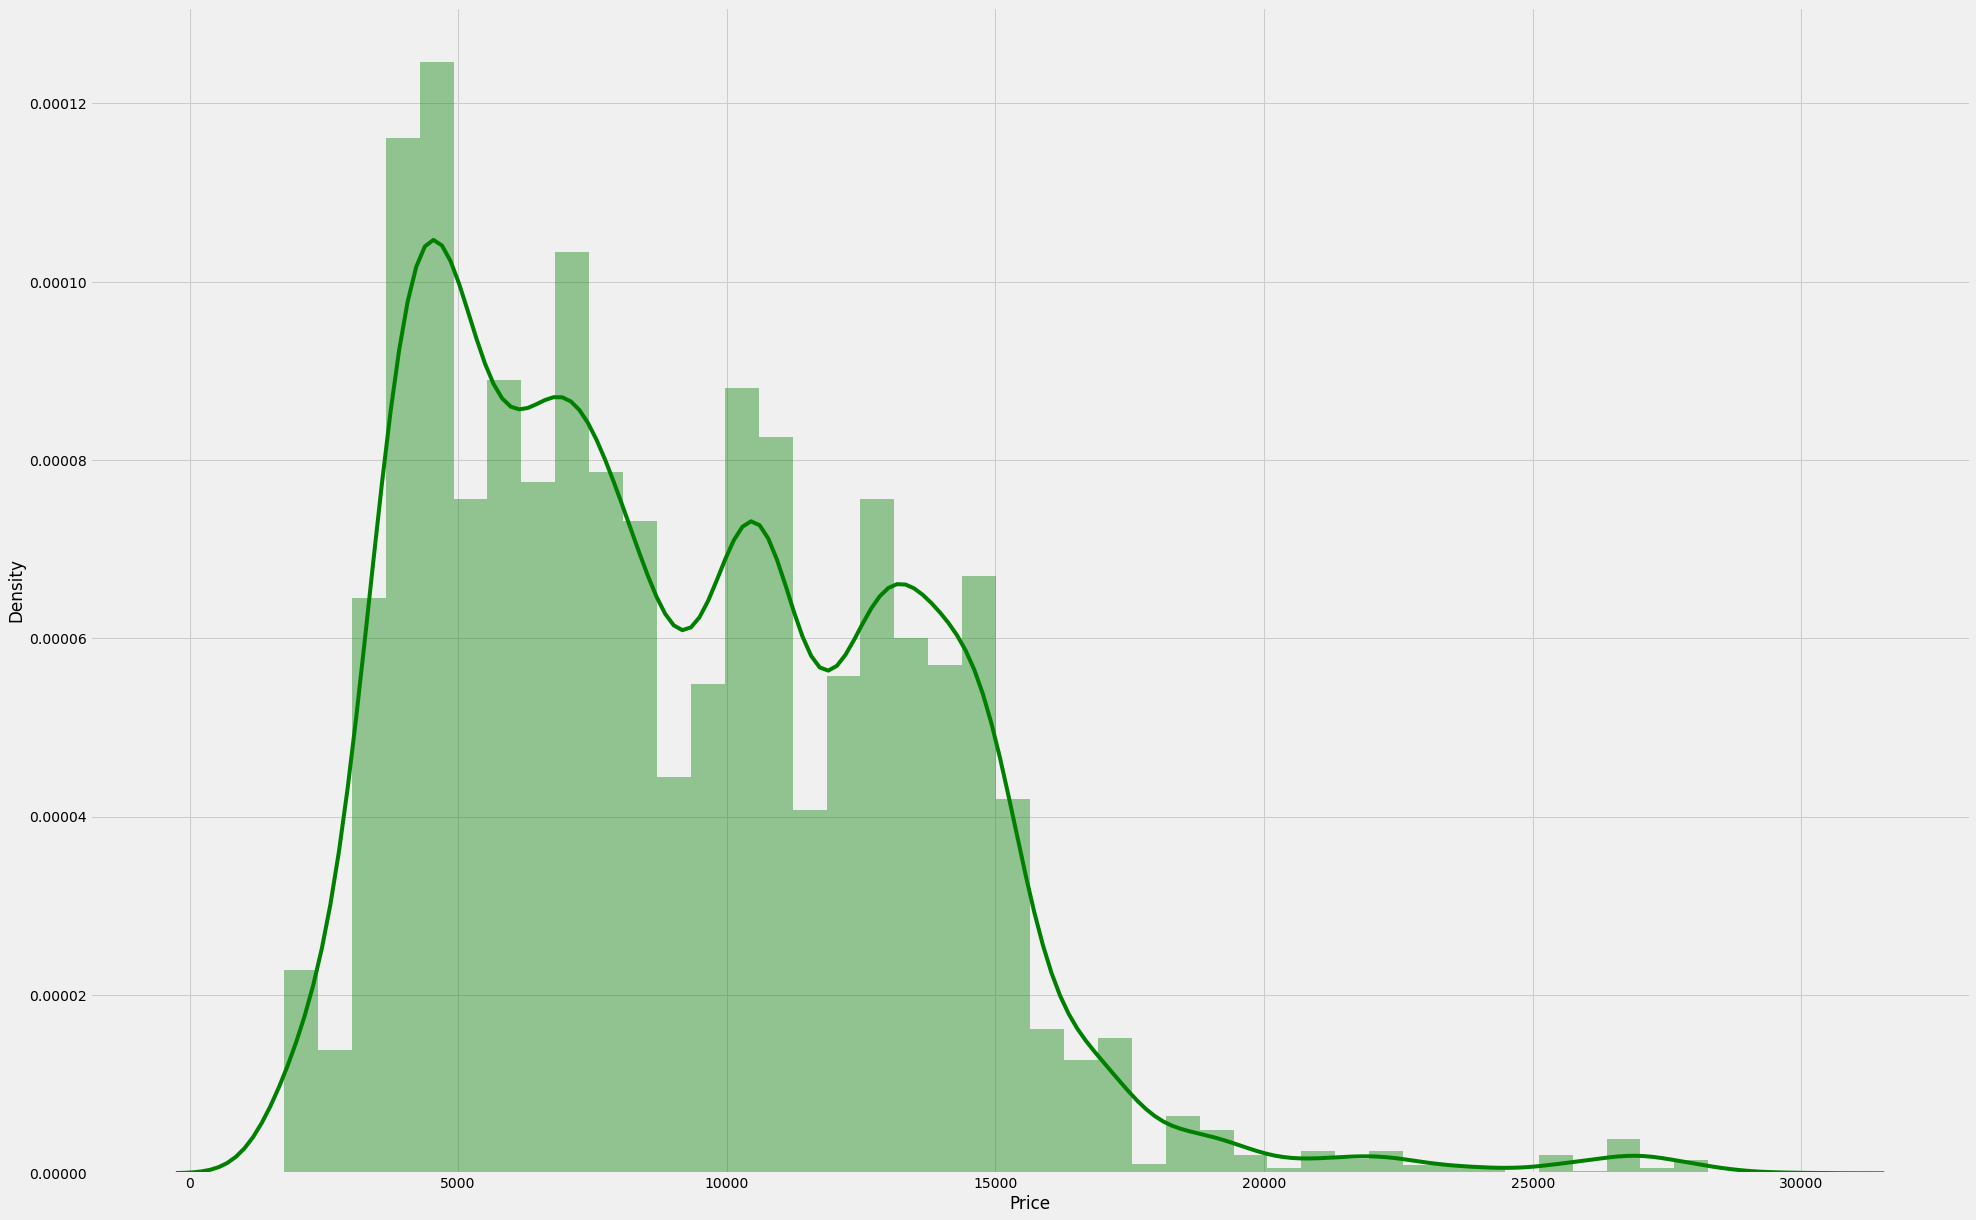

In [174]:
plt.figure(figsize=(30,20))
sns.distplot(data['Price'] ,color= "g")

<a id = '8.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Separate your independent & dependent data</strong></p>   

In [175]:
X=data.drop('Price',axis=1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [176]:
y=data['Price']

#### As now we dont have any missing value in data, we can definitely go ahead with Feature Selection

<a id = '9.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong> Feature Selection</strong></p>

### Feature Selection
   * Finding out the best feature which will contribute and have good relation with target variable. 
    
### Why to apply Feature Selection?
   * To select important features to get rid of curse of dimensionality ie..to get rid of duplicate features

### I wanted to find mutual information scores or matrix to get to know about the relationship between all features.

In [177]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [178]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.4, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.4, random_state=0))

In [179]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
        True,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [180]:
cols=X.columns

In [181]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = cols[(feature_sel_model.get_support())]

In [182]:
# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 34
selected features: 28


In [183]:
selected_feat

Index(['Total_Stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'Vistara',
       'Vistara Premium economy', 'Delhi', 'Kolkata', 'Mumbai', 'Cochin',
       'New Delhi', 'Journey_day', 'Journey_month', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hours', 'Duration_mins'],
      dtype='object')

In [184]:
x=X[selected_feat]

<a id = '0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong> Split dataset into train & test </strong></p>

In [185]:
# Import Libraries
from sklearn.model_selection import train_test_split
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=44, shuffle =True)

In [186]:
#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (7156, 30)
X_test shape is  (3526, 30)
y_train shape is  (7156,)
y_test shape is  (3526,)


<a id = '10.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Defining function For ML models</strong></p> 


In [187]:
def predict(ml_model):          
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)

<a id = '11.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Random Forest Algorithm</strong></p> 


Training score : 0.9577127114714105
predictions are: 
 [ 6265.72700595  8337.9089119  11263.20910714 ... 13423.29397698
  7537.70880719 10560.90541591]


r2 score: 0.817252338334979
MAE: 1169.9504456833588
MSE: 3467845.774823544
RMSE: 1862.2152869159743


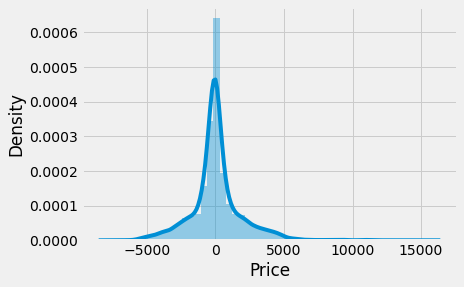

In [188]:
predict(RandomForestRegressor(ccp_alpha=0.2,n_estimators=1000))

<a id = '12.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Gradient Boosting</strong></p> 


Training score : 0.9725730984917962
predictions are: 
 [ 6094.98648625  8614.00000113 12681.         ... 13941.
  7480.         11147.3069999 ]


r2 score: 0.7190032576386649
MAE: 1347.9438986839193
MSE: 5332234.38734402
RMSE: 2309.1631357147594


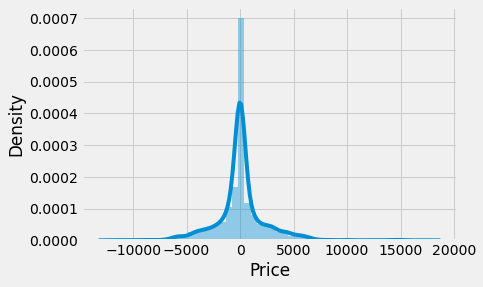

In [189]:
predict(GradientBoostingRegressor(alpha=.3 , n_estimators=320,learning_rate=0.9, max_depth=30))

<a id = '13.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Linear Regression Algorithm</strong></p> 


Training score : 0.6324576603797579
predictions are: 
 [ 7171.92917018  9928.56227141 12485.05442523 ... 12634.60704607
  7860.36219652 12892.82761777]


r2 score: 0.6115862469382383
MAE: 1946.0212900098556
MSE: 7370594.95134652
RMSE: 2714.8839664609095


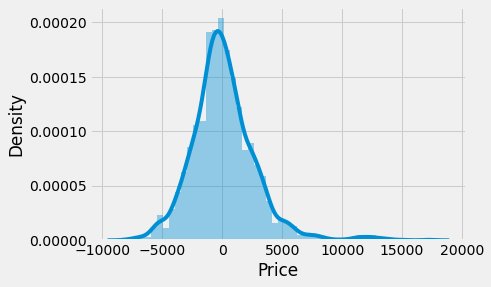

In [190]:
predict(LinearRegression())

<a id = '14.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>MLPRegressor</strong></p> 


Training score : 0.604998153757532
predictions are: 
 [ 7407.68790204 10104.60482014 12560.09861183 ... 14165.13737025
  7105.14456255 14099.02292817]


r2 score: 0.5943166435408317
MAE: 2026.5740331339946
MSE: 7698305.416306399
RMSE: 2774.5820255141853


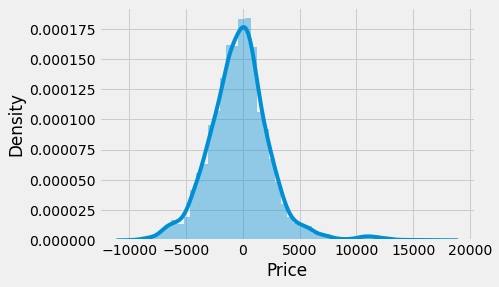

In [191]:
predict(MLPRegressor( activation='identity' , solver='adam',
    alpha=0.00000005,
    batch_size=100,
    learning_rate='adaptive',
    learning_rate_init=0.5))

<a id = '15.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Lasso Algorithm</strong></p> 


Training score : 0.6323711409787387
predictions are: 
 [ 7165.88495393  9922.53569718 12482.814521   ... 12628.0953411
  7851.28859325 12904.86823177]


r2 score: 0.6113964807660273
MAE: 1946.1263415166325
MSE: 7374195.981381654
RMSE: 2715.5470869387727


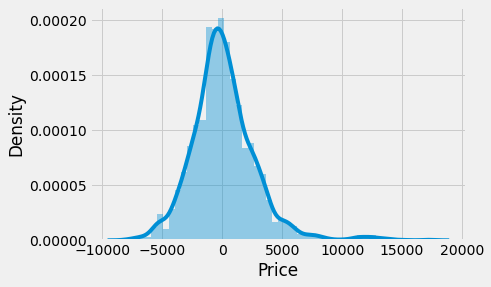

In [192]:
predict(Lasso(max_iter=100000,alpha=.5,selection='random'))

<a id = '16.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Ridge Algorithm</strong></p> 


Training score : 0.631068622102771
predictions are: 
 [ 7177.65832433  9899.55151799 12458.29456153 ... 12589.61561956
  7805.60314943 12983.31703291]


r2 score: 0.6093294414832544
MAE: 1951.946341357318
MSE: 7413420.414558249
RMSE: 2722.759705621899


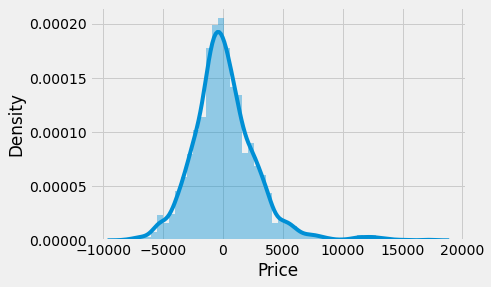

In [193]:
predict(Ridge(solver='saga',alpha=.9 ,  max_iter=320))

<a id = '17.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>K-Neighbors Algorithm</strong></p> 


Training score : 0.972527677248424
predictions are: 
 [ 6391.4628978   8863.36301474 12681.         ... 13941.
  7480.         10179.50374633]


r2 score: 0.5743642880205613
MAE: 1900.6326644121402
MSE: 8076924.169391055
RMSE: 2841.992992495065


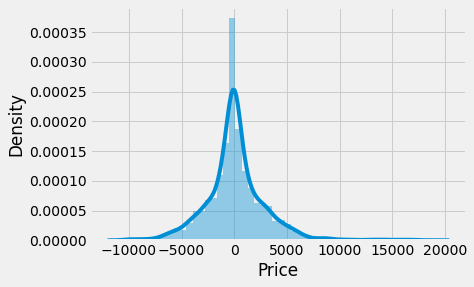

In [194]:
predict(KNeighborsRegressor(n_neighbors=3,
   
    weights='distance',
    algorithm='ball_tree',
    leaf_size=40,
    p=4,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,))